In [2]:
import pandas as pd
import glob 
import numpy as np
import os
import trajectory_planning_helpers as tph
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from f1tenth_benchmarks.utils.MapData import MapData
from f1tenth_benchmarks.utils.track_utils import RaceTrack, CentreLine

if os.getcwd().split('/')[-1] == 'debugging':
    os.chdir('../..')
    print(f'Changed directory to root of repo: {os.getcwd()}')


save_path = '../Data/Debugging/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

Changed directory to root of repo: /home/benjy/Documents/RacingRepos/f1tenth_benchmarks


In [8]:

summary_df = pd.read_csv("Logs/Summary.csv")

planner = "GlobalPlanPP"
friction_vals = np.linspace(0.55, 1, 10)
simulator_timestep_list = [2, 5, 10, 12, 14]

map_list = ["aut", "esp", "gbr", "mco"]

summary_df = summary_df[summary_df["Vehicle"] == planner]
test_ids = summary_df["TestID"].str.split("_", expand=True)
summary_df["mu"] = test_ids[0].str[2:].astype(float) / 100
timestep_series = test_ids[1].str[5:]
timestep_series.dropna(inplace=True)
summary_df["simulator_timestep"] = timestep_series.astype(int)
summary_df["frequency"] = 100 / summary_df["simulator_timestep"] 
summary_df["CompletionRate"] *= 100
summary_df["AvgProgress"] *= 100



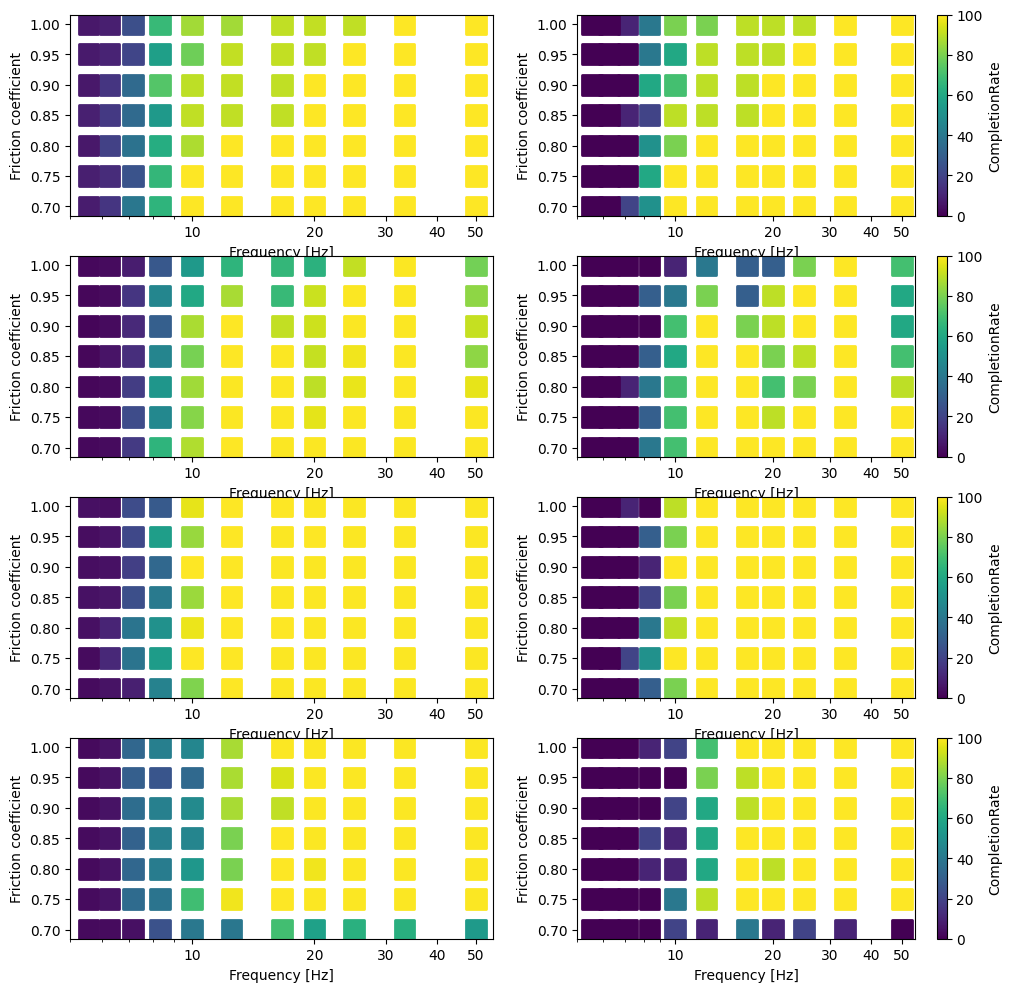

In [9]:
map_list = ["aut", "esp", "gbr", "mco"]

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

for i, map_name in enumerate(map_list):
    ax = axs[i]
    mini_df = summary_df[summary_df["MapName"] == map_name]
    mini_df.plot(x="frequency", y="mu", s=200, c="AvgProgress", kind="scatter", marker='s', linewidth=2, ax=ax[0], vmin=0, vmax=100, colorbar=False)
    mini_df.plot(x="frequency", y="mu", s=200, c="CompletionRate", kind="scatter", marker='s', linewidth=2, ax=ax[1], vmin=0, vmax=100)


# Set x-axis to log scale
for ax in axs.flatten():
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("Friction coefficient")
    ax.set_xlim(5, 55)
    ax.set_xscale('log')

    ax.set_xticks([10, 20, 30, 40, 50])
    ax.set_xticklabels([10, 20, 30, 40, 50])
